In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/images.png


In [2]:
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam,RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train=X_train.reshape(60000,28*28)
X_test=X_test.reshape(10000,28*28)
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [6]:
#Normalizing the valeus
X_train=X_train/255
X_test=X_test/255

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

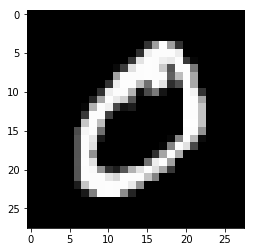

In [7]:
#Plotting a random sample from the train data
plt.imshow(X_train[1:2].reshape(28,28),cmap='gray')
y_train[1:2]

In [8]:
#Initializing a sequential model
model=keras.models.Sequential()

In [9]:
#Adding layes to the Sequential model
model.add(Dense(32,activation='sigmoid',input_shape=(28*28,)))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

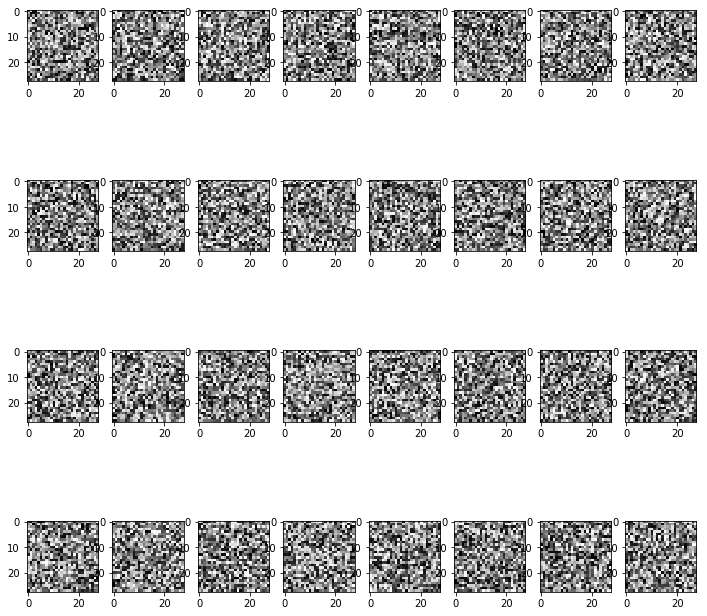

In [12]:
#Plotting weights of first layer with random initialization of weights
weights=[]
for i in model.layers:
    weights.append(i.get_weights())
layer1 = np.array(weights[0][0])
fig=plt.figure(figsize=(12, 12))
for i in range(1,33):
    fig.add_subplot(4,8,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')


In [13]:
model.fit(X_train,y_train,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 1.3174 - accuracy: 0.6977
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.4801 - accuracy: 0.8920
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.3172 - accuracy: 0.9162
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2569 - accuracy: 0.9295
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2212 - accuracy: 0.9381
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.1948 - accuracy: 0.9451
Epoch 7/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.1742 - accuracy: 0.9513
Epoch 8/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1580 - accuracy: 0.9556
Epoch 9/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1445 - accuracy: 0.9596
Epoch 10/10
60000/60000 [==============================

In [14]:
score=model.evaluate(X_test,y_test)
print("Loss = ",score[0])
print("Accuracy = ",score[1])

10000/10000 [==============================] - 0s 36us/step
Loss =  0.14706969869285821
Accuracy =  0.9555000066757202


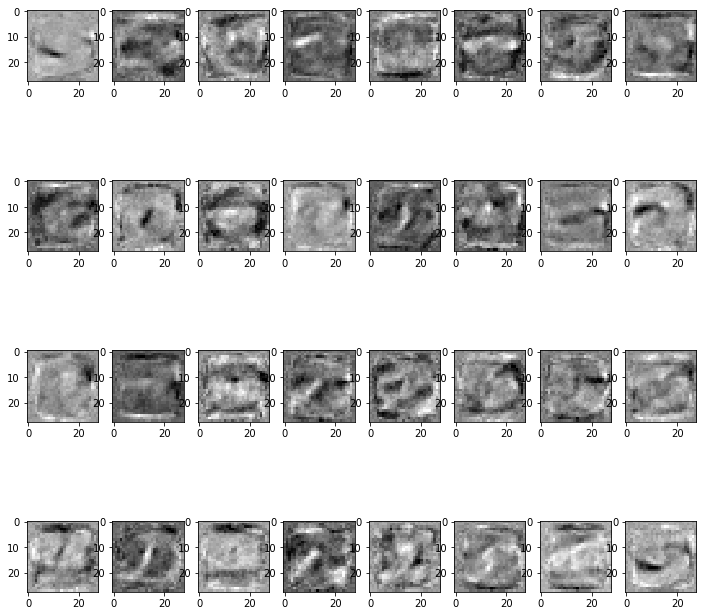

In [15]:
#Plotting weights of first layer af the model has learned the weights to fit the data
weights=[]
for i in model.layers:
    weights.append(i.get_weights())
layer1 = np.array(weights[0][0])
fig=plt.figure(figsize=(12, 12))
for i in range(1,33):
    fig.add_subplot(4,8,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')

In [16]:
import cv2
img=cv2.imread('/kaggle/input/images.png',cv2.IMREAD_GRAYSCALE)

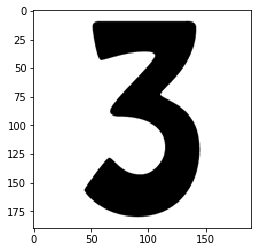

In [17]:
plt.imshow(img,cmap='gray')

In [18]:
img_resized=cv2.resize(img,(28, 28))

In [19]:
prediction = model.predict(img_resized.reshape(1,784))
thresholded = (prediction>0.5)*1
thresholded[0]
np.where(thresholded == 1)[1][0]

3